# Notebook 3:  Redes de Kohonen y SOM (Self organized maps)
En este notebook vamos a implementar el algoritmo de clustering SOM en R. El objetivo es entender como funciona este algoritmo y  aprender a utilizarlo con un ejemplo simple. Recuerde instalar previamente el paquete kohonen en R.



In [53]:
library(kohonen)
library(corrplot)
set.seed(7)

#ruta datos
#lee datos del archivo de texto como una matriz. La primera #columna se utiliza como vector de nombres de las filas
datos <-read.table("milk1.dat",row.names=1,dec=".",header=TRUE)
datos <- as.data.frame(datos)
summary(datos)

     WATER          PROTEIN            FAT           LACTOSE     
 Min.   :44.90   Min.   : 0.600   Min.   : 1.00   Min.   :0.000  
 1st Qu.:71.30   1st Qu.: 3.000   1st Qu.: 3.40   1st Qu.:2.700  
 Median :82.00   Median : 5.900   Median : 6.30   Median :4.700  
 Mean   :78.18   Mean   : 6.212   Mean   :10.31   Mean   :4.132  
 3rd Qu.:87.70   3rd Qu.: 9.700   3rd Qu.:13.10   3rd Qu.:5.600  
 Max.   :90.40   Max.   :12.300   Max.   :42.00   Max.   :6.900  
      ASH        
 Min.   :0.1000  
 1st Qu.:0.5300  
 Median :0.8000  
 Mean   :0.8632  
 3rd Qu.:1.1000  
 Max.   :2.3000  

### Ejercicio 1: 

a) Explique como funciona el método som, describa parámetros de entrada y salida y los gráficos obtenidos.



,WATER,PROTEIN,FAT,LACTOSE,ASH
V1,-2.5469654,1.1015752,2.6096438,-1.962526201,-0.40025366
V2,0.1404818,0.2480325,-0.2083923,-0.008891454,0.06083361
V3,-0.8003955,1.2003148,0.6719639,-0.934975169,1.46889877
V4,0.8023845,-0.9985317,-0.7112349,0.866388377,-0.76753524


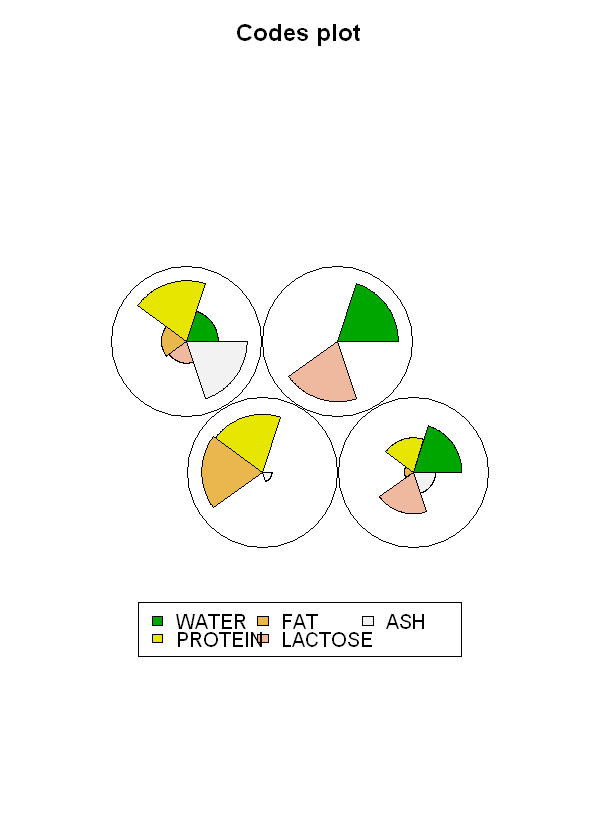

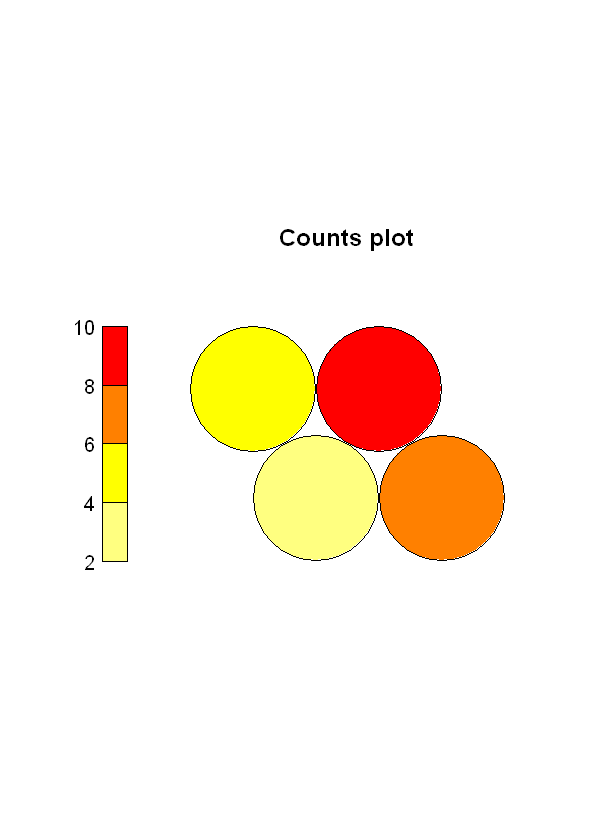

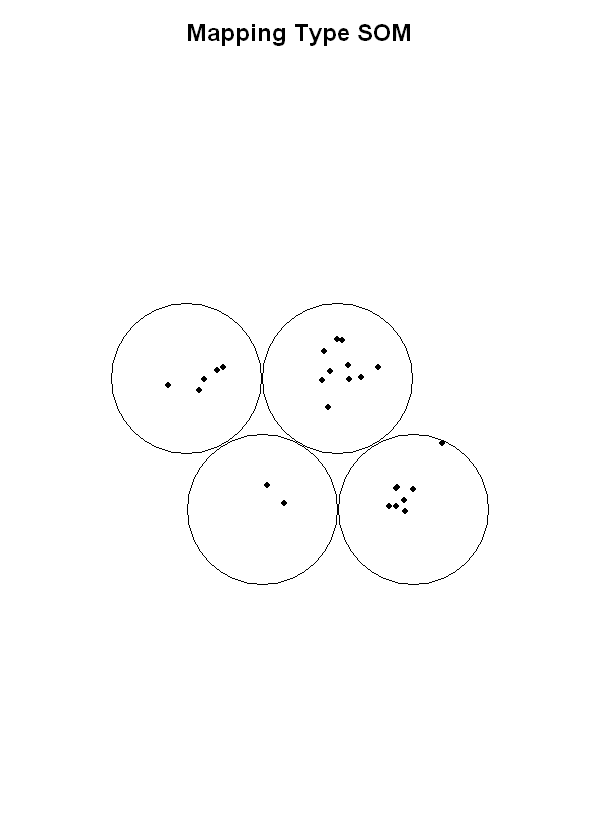

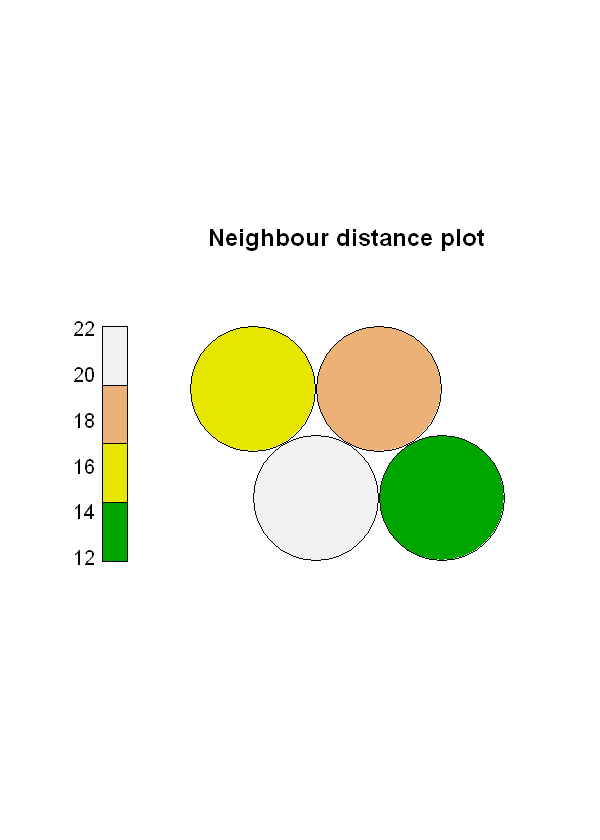

In [54]:
#create SOM grid
set.seed(1)

sommap <- som(scale(datos), grid = somgrid(2, 2, "hexagonal"))
plot(sommap)
sommap$codes

colors <- function(n, alpha = 1) {
    rev(heat.colors(n, alpha))
}

plot(sommap, type = "counts", palette.name = colors, heatkey = TRUE)

plot(sommap, type = "mapping", pchs = 20, main = "Mapping Type SOM")

plot(sommap, type = "dist.neighbours", palette.name = terrain.colors)



SOM es otro método que permite analizar datos de alta dimensionalidad en un plano bidimensional, realizando agrupación de datos por sus similaridades de acuerdo a la distancia euclideana de las observaciones. Su procesamiento parte de valores aleatorios que se van optimizando hasta formar vecindades. Los grupos adyacentes comparten cierta similitud.

Entre los parámetros de entrada recibe:
   * data   = Datos en forma matricial, cada fila un elemento.
   * grid   = Componente principal del método, define la cantidad y forma de agrupamiento a generar. Se basa en un tipo de somgrid.
   * rlen   = la cantidad de veces que se presentará (entrenará) la data.
   * alpha  = learning rate, cuánto varía en cada iteración.
   * radius = radio de cada conjunto sobre el cual agrupará.
   * entre otros.
   
Por otro lado, los distintos gráficos permiten interpretar de distinta forma la misma data agrupada.
* El primero, mediante gráficos de "área" busca visualizar la proporción entre las variables del grupo.
* Counts plot por su parte refleja la cardinalidad de los grupos, con un color más rojo aquellos más poblados.
* Mapping permite visualizar la distancia euclideana entre los miembros de un grupo, reflejando el valor medio y su varianza.
* En el último, podemos observar con colores la distancia anterior, mientras mayor sea la densidad o agrupación de elementos, tendrá un tono más verde, al contrario, si están muy dispersos se le asigna un tono más claro.

b) Modifique parámetros de entrada. Interprete y comente los resultados obtenidos. 

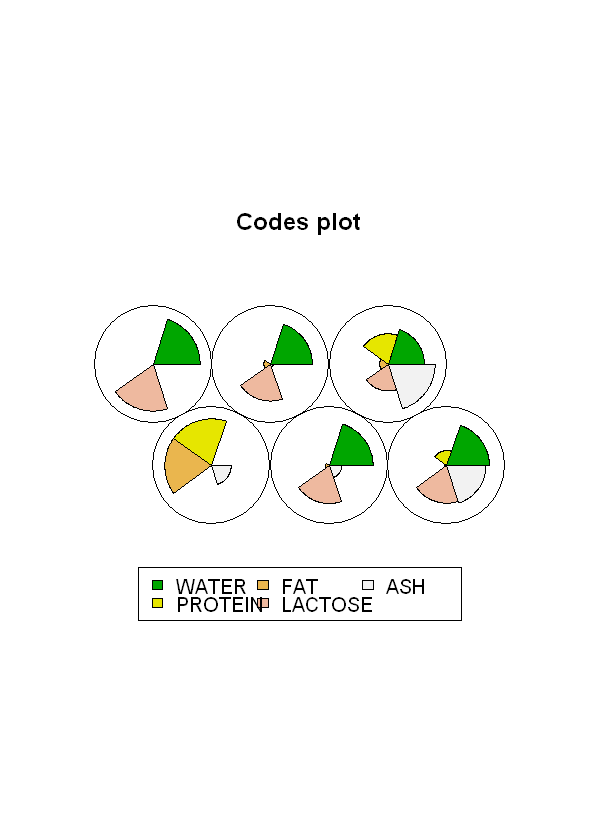

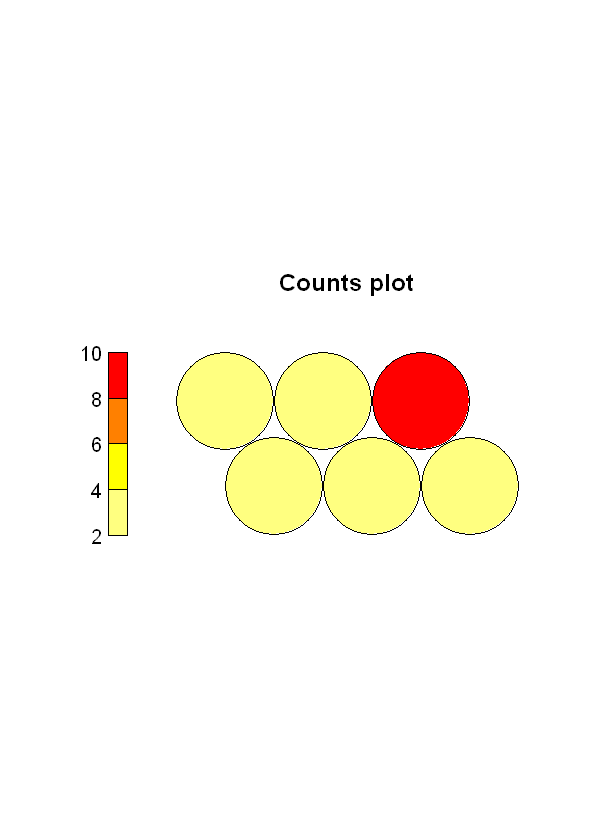

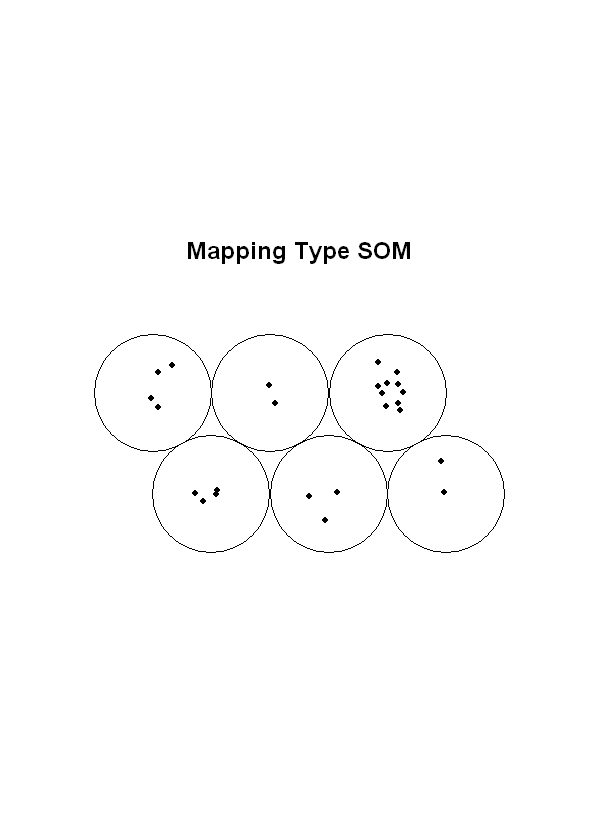

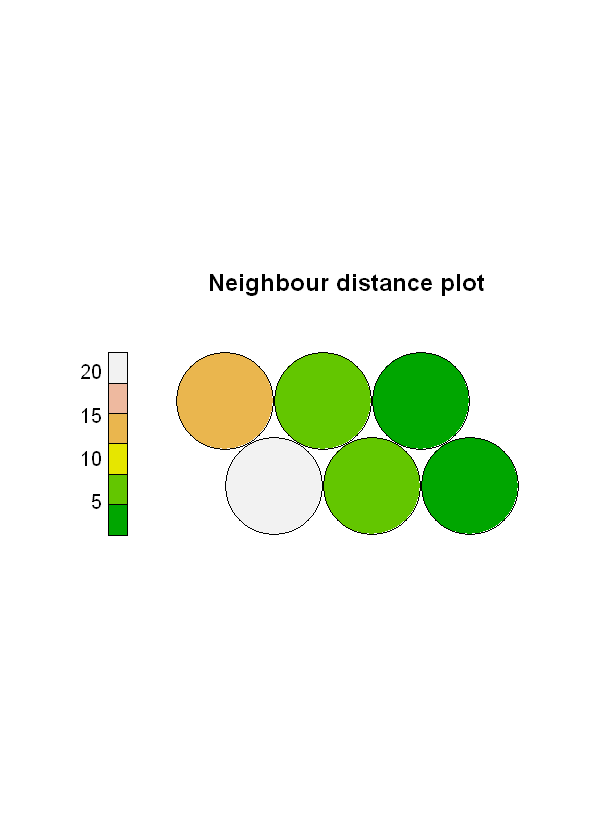

In [49]:
#create SOM grid
set.seed(1)
sommap <- som(scale(datos), grid = somgrid(3, 2, "hexagonal"),rlen=2)
plot(sommap)

colors <- function(n, alpha = 1) {
    rev(heat.colors(n, alpha))
}

plot(sommap, type = "counts", palette.name = colors, heatkey = TRUE)

plot(sommap, type = "mapping", pchs = 20, main = "Mapping Type SOM")

plot(sommap, type = "dist.neighbours", palette.name = terrain.colors)

En esta oportunidad se cambiaron los parámetros (partiendo de una misma semilla) para solicitar una agrupación en 6 subconjuntos, después de ser entrenada dos veces con toda la data. Este cambio produjo una distribución más homogénea de las proporciones observadas en el primer gráfico, a su vez que disminuye la distancia general entre los elementos, como se puede visualizar en el gráfico 4.

---

Warning message in matrix(sommap$codes[[1]], ncol = 4, nrow = 4, byrow = FALSE):
"la longitud de los datos [30] no es un submúltiplo o múltiplo del número de filas [4] en la matriz"

ERROR: Error in if (abs(dloc[2]) < 0.1) {: valor ausente donde TRUE/FALSE es necesario


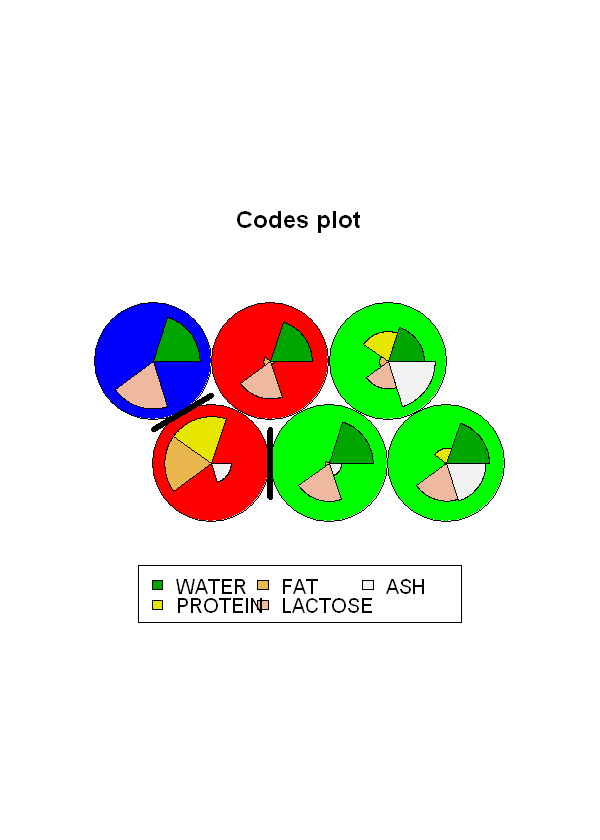

In [50]:
mat <- matrix(sommap$codes[[1]], ncol=4,nrow=4,byrow=FALSE)

## use hierarchical clustering to cluster the codebook vectors
groups<-3
som.hc <- cutree(hclust(dist(mat)), groups)

#plot
plot(sommap, type="codes", bgcol=rainbow(groups)[som.hc])

#cluster boundaries
add.cluster.boundaries(sommap, som.hc)


### Ejercicio 2: 

#### a) Explique como funciona esta nueva visualización.


Tomando como base los grupos asociados a las proporciones entre variables, la nueva visualización realiza un arbol jerárquico de los grupos solicitados (en este caso 3) "agrupando" en un nuevo nivel los conjuntos anteriores, utilizando como referencia visual los nuevos colores que los envuelven. Las líneas negras en cambio, son otra ayuda visual que explicita el corte o separación jerárquica, pero sin quitar el hecho de que los conjuntos vecinos son más similares entre ellos que con sus pares lejanos.



#### b) Interprete y comente los resultados obtenidos. 

Al trabajar sobre los conjuntos similares, mientras menor sea la diferencia entre sus proporciones (variables más representativas) más cerca estarán y por tanto antes se agruparán de manera jerárquica. El corte del árbol, en este caso, se da cuando se logran formar 3 grandes grupos.

Los dos grupos verdes destacan por contener agua y lactora en proporciones muy altas en comparación a los otros dos grupos. Mientras que el destacado en rojo prioriza la grasa de la leche por sobre el ash.

---

### Ejercicio 3: 

a) De los datos en el archivo comunas.csv escoja un subconjunto de datos a los cuales aplicar este algoritmo. Justifique su elección

b) Realice las estimaciones, discuta sus resultados y proponga una estrategia gráfica para representarlos.

**Respuesta 3.a**

Para realizar el analisis del subconjunto de datos a escoger, se estudiara la correlacion de los datos socioeconomicos-salud que tienen las comunas de chile.

In [71]:
datos <- read.csv("comunas.csv",header=TRUE,sep=";",dec=".", check.names = FALSE, encoding="UTF-8")
value <- datos[,1] == 14
subconjunto <- datos[value, c(3,4,5,6,7,8,9,10,11,12,13,14)]
row.names(subconjunto) <- c('Valdivia', 'Los Lagos', 'Mafil', 'Paillaco', 'Linares', 'Lanco', 'Rio Bueno', 'La Union',
                          'Mariquina','Futrono','Corral','Panguipulli','Lago Ranco')
colnames(subconjunto) <- c('Poblacion en miles de habitantes','IDSE','Ingreso por persona mensual(miles $)','Porcentaje de pobreza',
                         'Escolaridad','Material de vivienda bueno o aceptable','Porcentaje de alcantarillado o fosa septica',
                         'Esperanza de vida al nacer','Indice de desarrollo humano', 'Tasa AVPP x1000h',
                         'Porcentaje de defuncion +50', 'Mortalidad Infantil x1000NV')
subconjunto

,Poblacion en miles de habitantes,IDSE,Ingreso por persona mensual(miles $),Porcentaje de pobreza,Escolaridad,Material de vivienda bueno o aceptable,Porcentaje de alcantarillado o fosa septica,Esperanza de vida al nacer,Indice de desarrollo humano,Tasa AVPP x1000h,Porcentaje de defuncion +50,Mortalidad Infantil x1000NV
Valdivia,161.7,0.652,202.7,17.1,10.6,88.7,95.3,76.8,0.573,78.9,75.5,6.9
Los Lagos,21.7,0.549,149.8,15.7,8.4,91.8,84.5,76.7,0.486,72.5,77.3,7.1
Mafil,7.0,0.534,158.6,16.5,8.7,88.7,75.2,71.9,0.401,99.8,79.3,7.9
Paillaco,19.9,0.523,139.1,19.3,8.6,92.4,78.4,75.1,0.442,100.7,80.1,10.2
Linares,91.1,0.514,145.5,23.8,9.2,74.6,85.9,76.6,0.476,87.3,77.2,8.7
Lanco,16.6,0.513,137.3,20.5,8.7,91.3,75.3,74.9,0.436,90.7,72.5,5.4
Rio Bueno,31.3,0.510,146.1,21.2,8.1,94.9,79.3,75.4,0.428,96.5,76.4,6.1
La Union,38.8,0.499,156.5,19.6,8.9,77.4,70.7,75.9,0.475,91.9,78.6,7.4
Mariquina,18.4,0.488,152.4,20.2,8.4,87.2,66.5,74.9,0.437,98.2,77.9,13.7
Futrono,15.8,0.467,129.9,20.8,8.3,79.6,70.7,75.9,0.438,73.8,69.9,0.0


El subconjunto a escoger seran todos los datos de la region de los rios, ya que este fue el subconjunto que escogimos en el laboratorio pasado y creemos que no es necesario ocupar un conjunto de datos muy extenso ya que el objetivo de este laboratorio es entender como funciona las redes de kohonen y som. ademas de poder ver claramente las comunas pertenecientes a cierto grupo.
Tambien es importante mencionar que ocuparemos todas las variables ya que nos interesa saber como se comportan estas a lo largo de la region de los rios.

**Respuesta 3.b**

In [92]:
summary(subconjunto)

 Poblacion en miles de habitantes      IDSE       
 Min.   :  5.0                    Min.   :0.4180  
 1st Qu.: 15.8                    1st Qu.:0.4670  
 Median : 19.9                    Median :0.5100  
 Mean   : 36.3                    Mean   :0.5027  
 3rd Qu.: 35.1                    3rd Qu.:0.5230  
 Max.   :161.7                    Max.   :0.6520  
 Ingreso por persona mensual(miles $) Porcentaje de pobreza  Escolaridad    
 Min.   :115.0                        Min.   :15.7          Min.   : 7.700  
 1st Qu.:134.9                        1st Qu.:19.2          1st Qu.: 8.100  
 Median :145.5                        Median :20.2          Median : 8.400  
 Mean   :145.7                        Mean   :19.9          Mean   : 8.569  
 3rd Qu.:152.4                        3rd Qu.:21.2          3rd Qu.: 8.700  
 Max.   :202.7                        Max.   :23.8          Max.   :10.600  
 Material de vivienda bueno o aceptable
 Min.   :74.60                         
 1st Qu.:81.20          

,Poblacion en miles de habitantes,IDSE,Ingreso por persona mensual(miles $),Porcentaje de pobreza,Escolaridad,Material de vivienda bueno o aceptable,Porcentaje de alcantarillado o fosa septica,Esperanza de vida al nacer,Indice de desarrollo humano,Tasa AVPP x1000h,Porcentaje de defuncion +50,Mortalidad Infantil x1000NV
V1,-0.2998945,-0.3637257,0.08122260,0.2705478,-0.26112127,-0.05819626,-0.5894678,-0.29724560,-0.2904317,0.5450926,0.40763767,1.4056783
V2,-0.4155489,0.3676813,-0.17348344,-0.4373290,0.05454084,0.90091838,0.3774932,-0.46756274,-0.1896285,0.8049777,1.30838993,0.6927097
V3,-0.1313223,0.0990754,-0.01288482,0.5240397,-0.60693749,1.30043352,0.4514931,0.03695666,-0.3662053,0.4782245,0.18395305,-0.5318932
V4,2.7020883,2.3623937,2.59182922,-1.1622468,2.60427079,0.39231375,1.7379708,0.85067301,2.3963734,-0.7215071,0.05067518,-0.2041109


SOM of size 2x2 with a hexagonal topology and a bubble neighbourhood function.
The number of data layers is 1.
Distance measure(s) used: sumofsquares.
Training data included: 13 objects.
Mean distance to the closest unit in the map: 7.369.


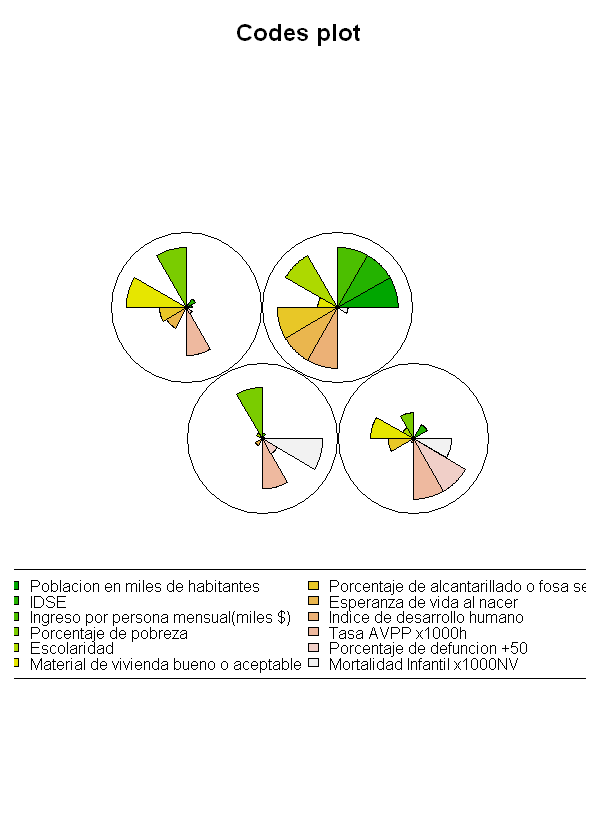

[1] 6 3 3 1


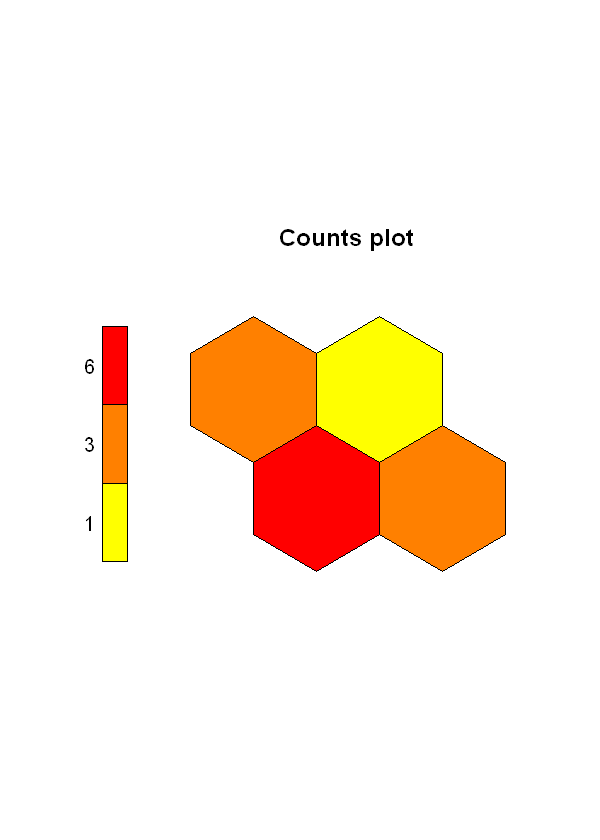

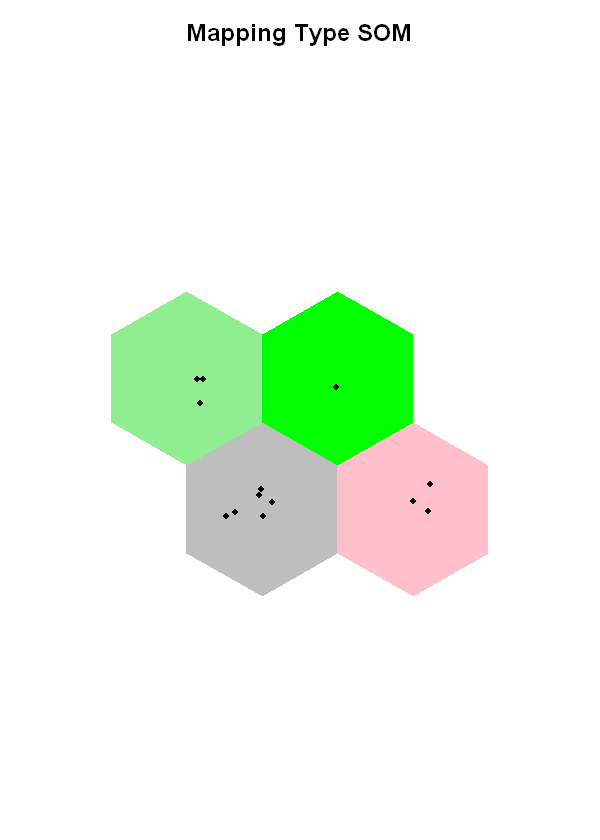

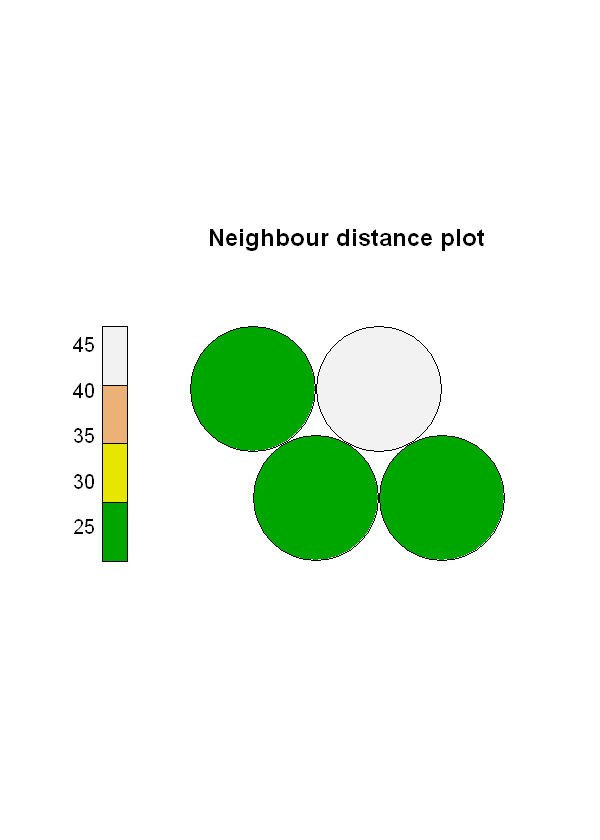

In [102]:
#create SOM grid
set.seed(1)
sommap <- som(scale(subconjunto), grid = somgrid(2, 2, "hexagonal"),rlen=2)
pesos<-sommap$codes
pesos
plot(sommap)

summary(sommap)

colors <- function(n, alpha = 1) {
    rev(heat.colors(n, alpha))
}

countsData <- plot(sommap, type = "counts", palette.name = colors, heatkey = TRUE, label, shape="straight")

print(countsData)

bgcols <- c("gray", "pink", "lightgreen", "green")

plot(sommap, type = "mapping", pchs = 20, main = "Mapping Type SOM", bgcol = bgcols, shape = "straight", border = NA)

plot(sommap, type = "dist.neighbours", palette.name = terrain.colors)


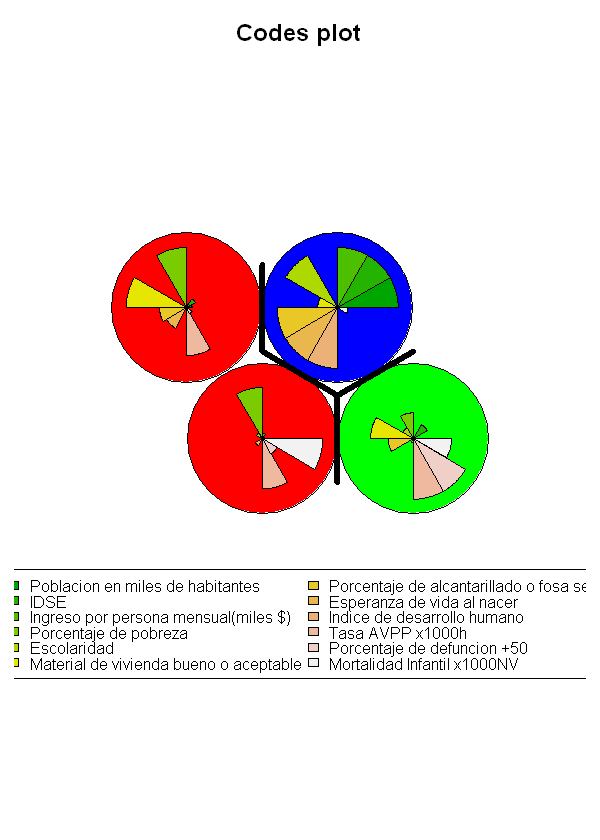

In [103]:
mat <- matrix(sommap$codes[[1]], ncol=4,nrow=4,byrow=FALSE)

## use hierarchical clustering to cluster the codebook vectors
groups<-3
som.hc <- cutree(hclust(dist(mat)), groups)

#plot
plot(sommap, type="codes", bgcol=rainbow(groups)[som.hc])

#cluster boundaries
add.cluster.boundaries(sommap, som.hc)


Se dividieron las 13 comunas de la region de los rios en 4 grupos.  

**Grupo 1**: Lago Rango, Panguipulli, Corral, Mariquina, La Union, Linares.  

**Grupo 2**: Los lagos, Mafil, Paillaco.  

**Grupo 3**: Lanco, Rio Bueno, Futrono.  

**Grupo 4** : Valdivia

Dicho esto, se puede decir que el **grupo 1** está más influenciado por el peso de las siguientes variables: en la Tasa AVPP, mortalidad infantil y el porcentaje de pobreza. El **grupo 2** está más influenciado por el peso de la Tasa de AVPP y el porcentaje de defunción para personas mayores a 50 años. El **grupo 3** está más influenciado por el material de vivienda bueno o aceptable, porcentaje de pobreza y la tasa de AVPP. Y finalmente el **grupo 4** compuesto sólo por Valdivia, es el más influenciado por las variables, estas son: Escolaridad, Poblacion en miles de habitantes, IDSE, ingreso por persona mensual, porcentaje de alcantarillado, esperanza de vida al nacer e indice de desarrollo humano. Según estos datos podemos decir que Valdivia es la ciudad de la región de los Rios más desarrollada, lo cual tiene sentido ya que esta es la capital por lo cual presentara mejores niveles socio-economicos y de salud. Tambien es importante mencionar que los grupos más parecidos son el grupo 3 y 1 ya que estos presentan un nivel similar de pobreza y de Tasa AVPP.

Para representar esto de una manera grafica, utilizaremos las componentes principales ya que en este grafico podemos ver efectivamente las variables que tienen una mayor influencia en los diferentes grupos mencionados anteriormente

In [98]:
a = map(sommap, scale(subconjunto))$unit.classif

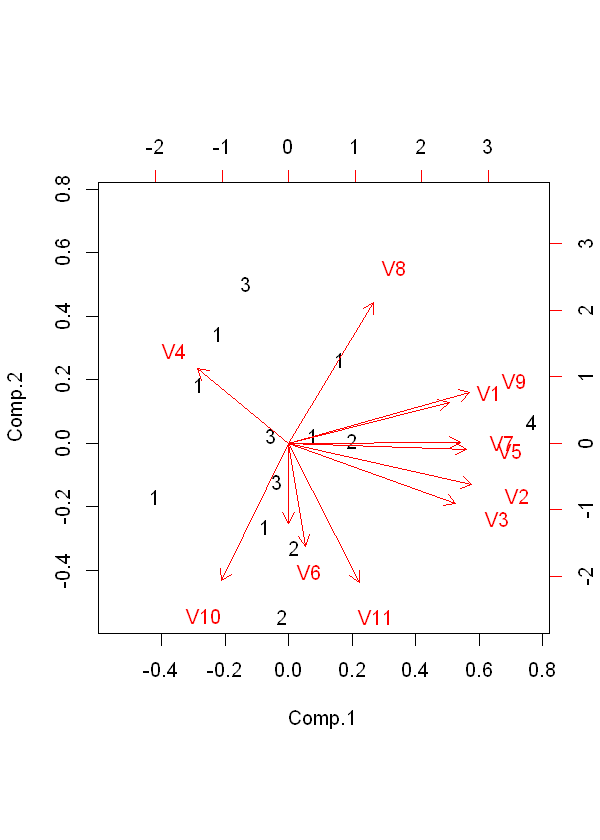

In [100]:
res <- princomp(datos_box, cor=TRUE)
biplot(res, xlabs= a)